In [3]:
%matplotlib notebook
import matplotlib as mpl
mpl.get_backend()
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
plt.style.use('ggplot')
size = (12,10)

# Introduction to Linear and Polynomial Regression and Interpolation

**GOALS**:

* Understand the meaning of linear and polynomial lines of best fit

* Use Python to visualize and find lines of best fit

* Use Python to examine RMSE and the Correlation of Coefficient

---

### What is Linear Regression and a "GOOD FIT"

From the text, we have the first dataset where $t$ represented the number of years since 1900 and $G$ represents the gross receipts in billions for each year.  We can plot this and compare the fit of the linear equation given on p88.

$$G = 3.129t - 258.81$$

First, we create and plot our data.

In [4]:
t = [98, 99, 100, 101, 102, 103]
G = [48.0, 51.45, 54.04, 55.94, 60.49, 64.10]

<IPython.core.display.Javascript object>


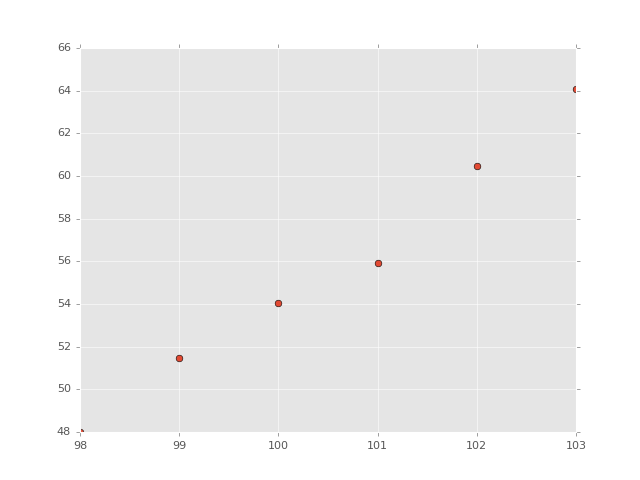

In [5]:
plt.plot(t, G, 'o')

Now we can add labels and plot the line of best fit.  We have to create a different array to fit the line for an image like the text.  We do this with 

```python
x = np.linspace(98, 104, 1000)
```

<IPython.core.display.Javascript object>


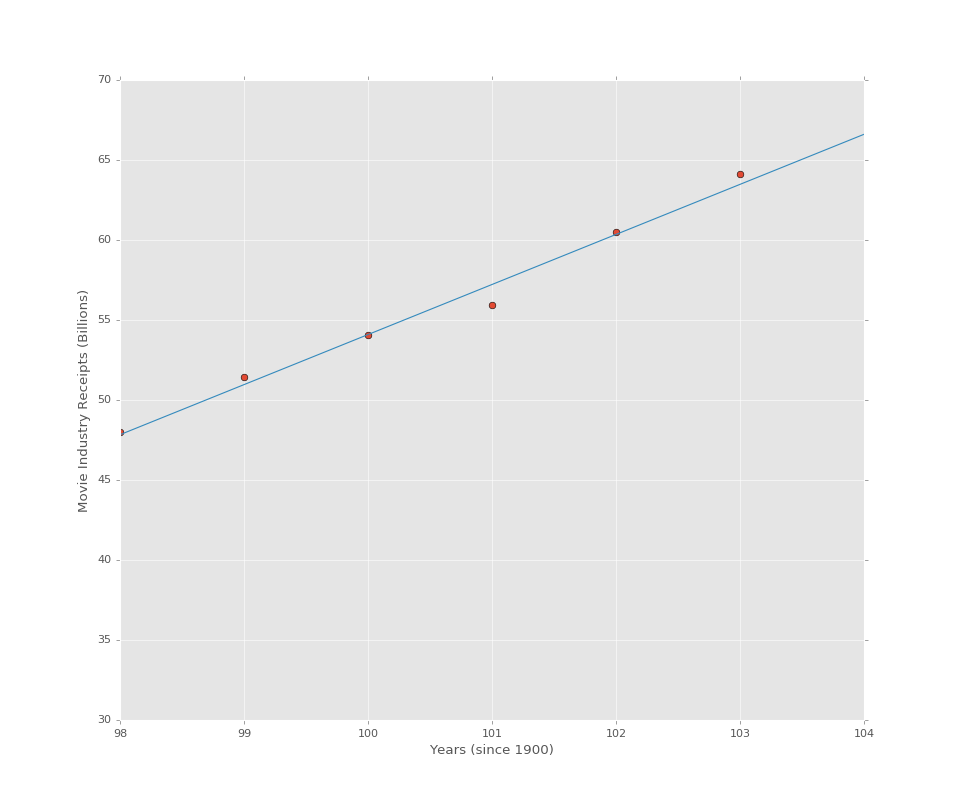

(30, 70)

In [6]:
plt.figure(figsize=size)
plt.plot(t, G, 'o')
x = np.linspace(98,104,1000)
plt.plot(x, 3.129*x - 258.81)
plt.xlabel("Years (since 1900)")
plt.ylabel("Movie Industry Receipts (Billions)")
plt.ylim(30,70)

### Comparing Fits

Additionally, we want to know how good a fit this function is in comparison to other options.  This happens in example 2.  First we plot the second example data.

<IPython.core.display.Javascript object>


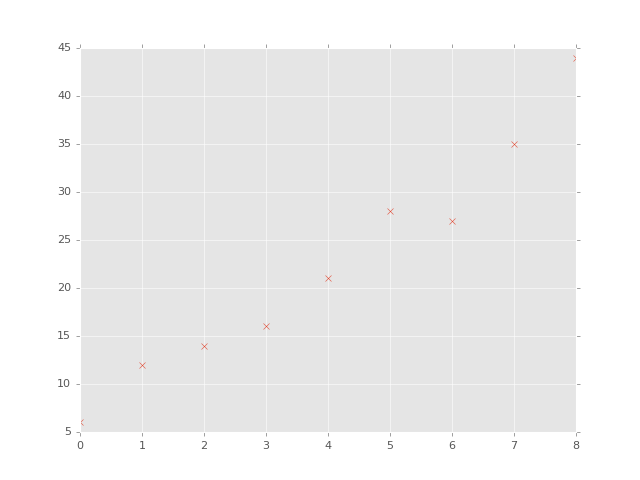

In [7]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8]
y = [6, 12, 14, 16, 21, 28, 27, 35, 44]
plt.figure()
plt.plot(x,y,'x')

Now, we define our x variable and create three functions to plot along with the data.

In [8]:
def a(x):
    return 4*x + 10

def b(x):
    return 4*x + 4

def c(x):
    return 5*x + 3

<IPython.core.display.Javascript object>


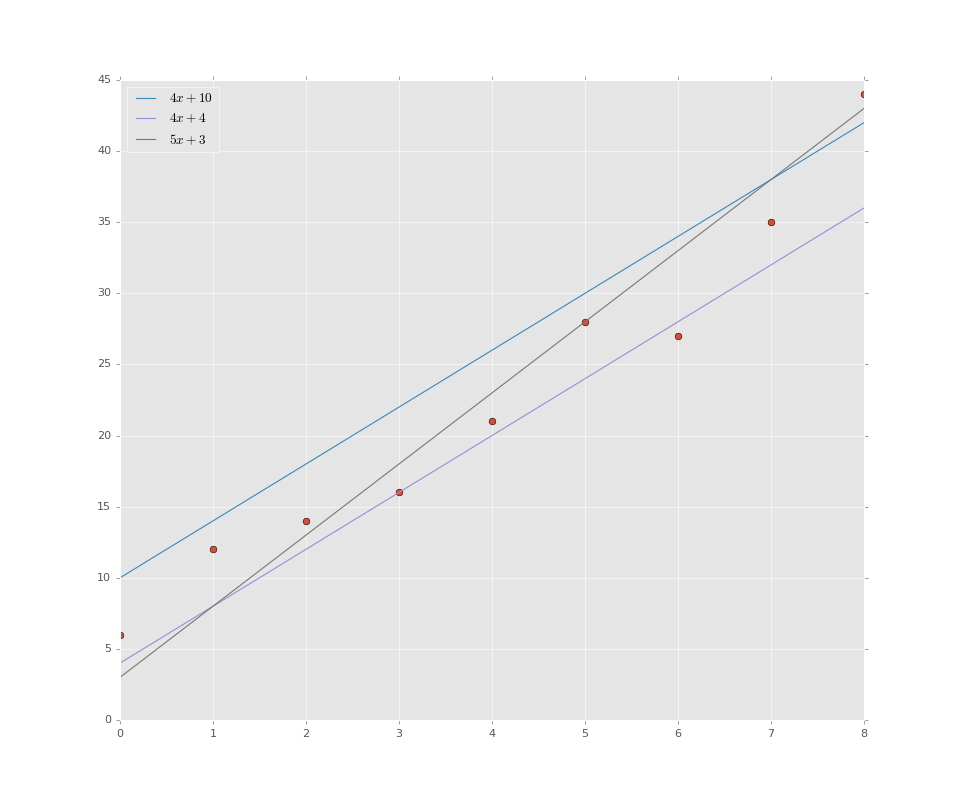

In [9]:
x2 = np.linspace(0,8,100)
plt.figure(figsize = size)
plt.plot(x,y,'o')
plt.plot(x2, a(x2), label = '$4x+10$')
plt.plot(x2, b(x2), label = '$4x+4$')
plt.plot(x2, c(x2), label = '$5x + 3$')
plt.legend(loc = "best")

#### Least Squares

What we really want, is a minimum distance between the data and the line proposed.  Let's plot the example at the points of data and their fit with line 1.

<IPython.core.display.Javascript object>


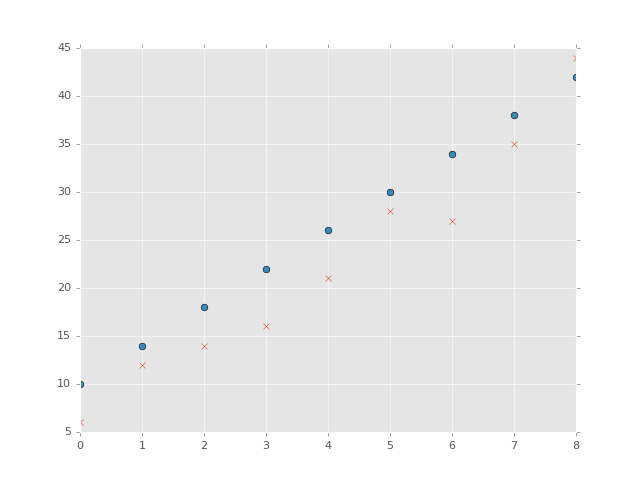

In [10]:
x = np.linspace(0,8,9)
plt.figure()
plt.plot(x,y,'x')
plt.plot(x,a(x),'o')

### How Good of a Fit?

The graph gives you an idea of how good an approximation the function $y = 4x + 10$ is for the data.  We quantify this as follows:

* Find the distance between data points and corresponding value in the function

```python
diff1 = y - a(x)
```

* Square these values

```python
diff_sqrd1 = (y - a(x))**2
```

* Sum the squares of these values

```python
diff_sqrd1.sum()
```

In [11]:
diff1 = y - a(x)
diff1

array([-4., -2., -4., -6., -5., -2., -7., -3.,  2.])

In [12]:
diff_sqrd1 = (y - a(x))**2
diff_sqrd1

array([ 16.,   4.,  16.,  36.,  25.,   4.,  49.,   9.,   4.])

In [13]:
diff_sqrd1.sum()

163.0

### Which is the Best?

Compare the sum of squares for `a(x)` to those for `b(x)` and `c(x)`.  Which is the least?  What does this mean?

In [14]:
diff2 = y - b(x)
diff2

array([ 2.,  4.,  2.,  0.,  1.,  4., -1.,  3.,  8.])

In [15]:
diff_sqrd2 = diff2**2
diff_sqrd2

array([  4.,  16.,   4.,   0.,   1.,  16.,   1.,   9.,  64.])

In [16]:
diff_sqrd2.sum()

115.0

In [17]:
diff3 = y - c(x)
diff3_sqrd = diff3 **2
diff3_sqrd.sum()

80.0

### Finding the Line of Best Fit

   The next example in the text gave the following data and asked us to use a computer program to find the line of best fit.  We will first use **numpy** to find this.  Numpy has a function called `polyfit` that fits polynomials of different degrees to data.  We are looking for a linear function, so here we tell numpy to find a polynomial fit of degree 1.
   
![](table_1.png)

<IPython.core.display.Javascript object>


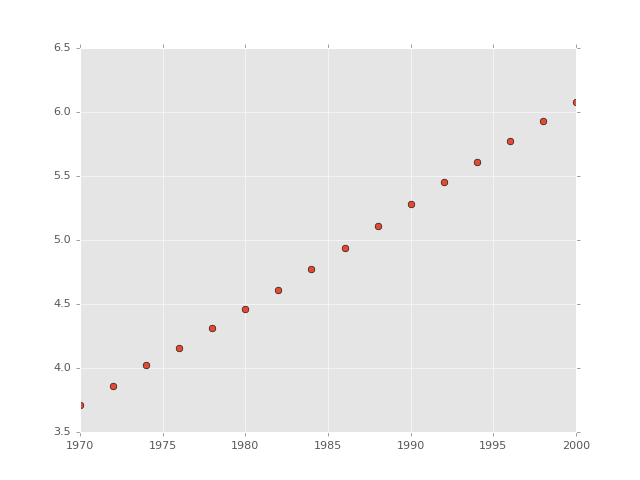

In [18]:
Year = np.linspace(1970,2000,16)
Pop = [3.71, 3.86, 4.02, 4.16, 4.31, 4.46, 4.61, 4.77, 4.94, 5.11, 5.28, 5.45, 5.61, 5.77, 5.93, 6.08]
plt.figure()
plt.plot(Year, Pop, 'o')

In [20]:
x = (1970,2000,10000)
poly = np.polyfit(Year, Pop, 1) #Get the Polynomial Degree 1 is Linear
y_fit = np.polyval(poly, x ) #Evaluate the Polynomial

In [21]:
poly

array([  7.97867647e-02,  -1.53497353e+02])

In [22]:
x2 = np.linspace(1970,2000,10000)
def guess(x):
    return 7.97867647*10**(-2.0)*x - 153.48735

<IPython.core.display.Javascript object>


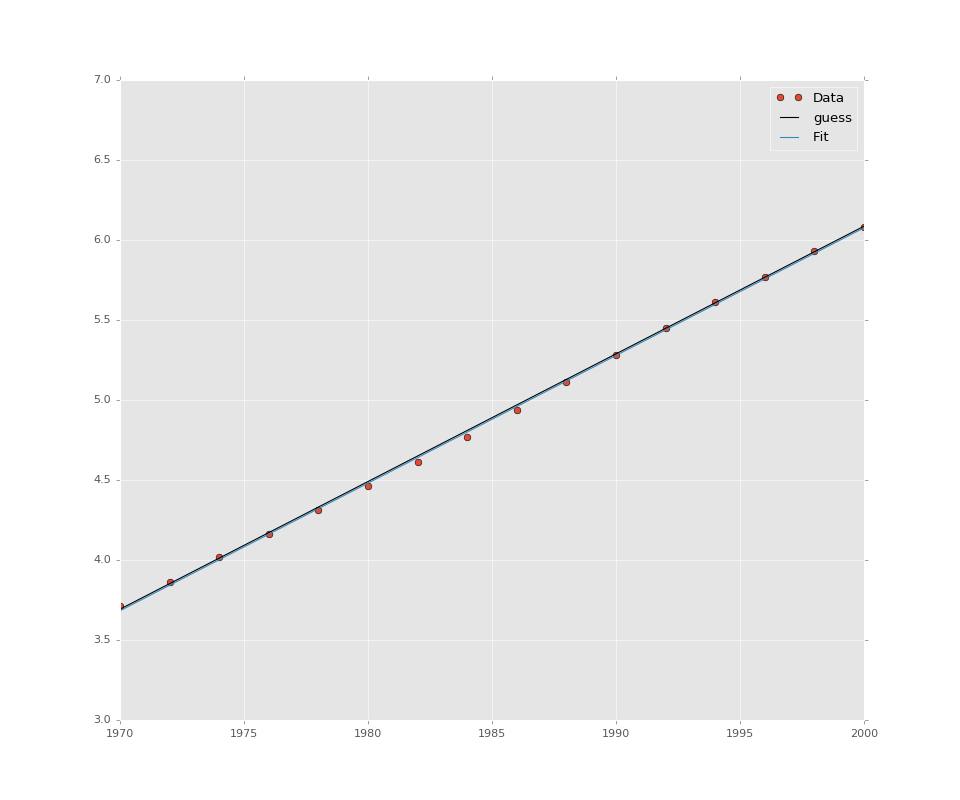

In [23]:
plt.figure(figsize = size)
plt.plot(Year, Pop, 'o', label = "Data")
plt.plot(x2, guess(x2), '-k', label = "guess")
plt.plot(x, y_fit, label = "Fit")
plt.xlim(1970,2000)
plt.ylim(3,7)
plt.legend(loc="best")

### Correlation Coefficient



<IPython.core.display.Javascript object>


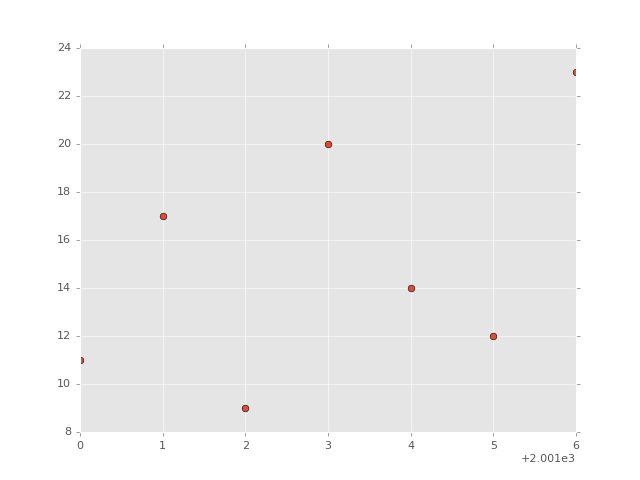

In [24]:
yr = [2001, 2002, 2003, 2004, 2005, 2006, 2007]
pop = [11, 17, 9, 20, 14, 12, 23]
plt.figure()
plt.plot(yr, pop, 'o')

In [ ]:
poly = np.polyfit(yr, pop, 1) #Get the Polynomial
x = np.linspace(min(yr), max(yr), 10000)
y_fit = np.polyval(poly, x)
y_fit

In [25]:
alpha, beta, r_value, p_value, std_err = stats.linregress(yr, pop) #
alpha, beta, r_value

(1.107142857142857, -2203.571428571428, 0.47077897290385984)

<IPython.core.display.Javascript object>


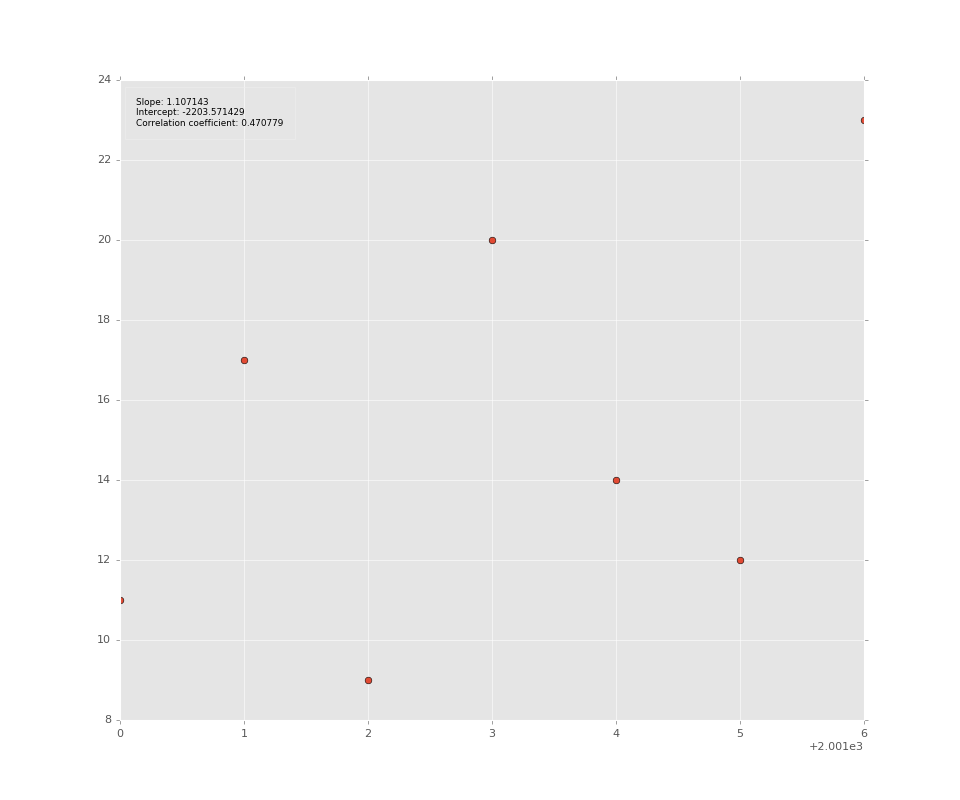

In [26]:
fig = plt.figure(figsize=size)
ax = fig.add_subplot(111)
x2 = np.linspace(min(yr), max(yr), 10000)
plt.plot(yr, pop, 'o')
plt.plot(x, y_fit)
plt.ylim(8, 24)
plt.xlim(2001,2007)
text_string = "Slope: %f" % (alpha)
text_string += "\nIntercept: %f" % (beta)
text_string += "\nCorrelation coefficient: %f" % (r_value)
ax.text(0.022, 0.972, text_string, transform=ax.transAxes, verticalalignment='top', bbox=dict(facecolor='none', pad=10), fontsize=8)

In [28]:
qx = [i for i in range(1,9)]
qx

[1, 2, 3, 4, 5, 6, 7, 8]

<IPython.core.display.Javascript object>


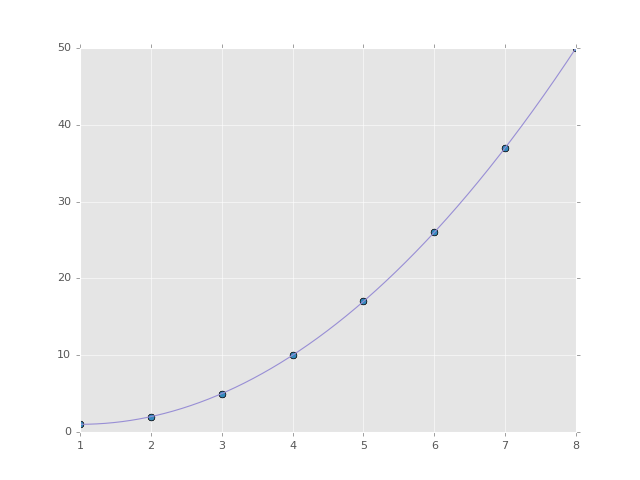

In [29]:
qy = [1, 2, 5, 10, 17, 26, 37, 50]
plt.figure()
plt.plot(qx, qy, 'o')

In [49]:
quadfit = np.polyfit(qx, qy, 2)
quadfit

array([ 1., -2.,  2.])

$$ y = 1x^2 - 2x + 2$$

In [30]:
plt.plot(qx, qy, 'o')
x = np.linspace(1,8,1000)
plt.plot(x, x**2 - 2*x +2)